## 常用聚类算法对比评估

### 测试数据

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

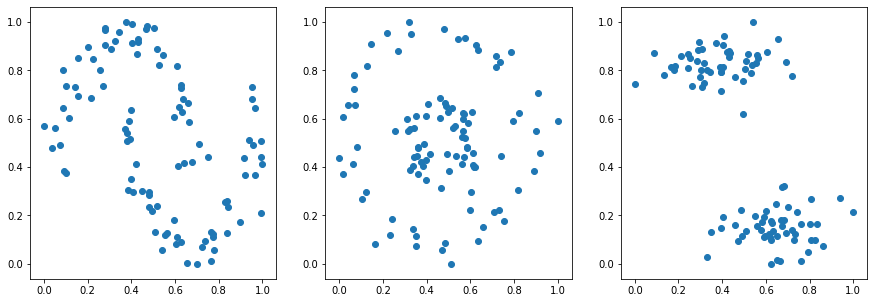

In [10]:
from sklearn.preprocessing import MinMaxScaler

blobs,_=datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=1.5,random_state=10)
circles,_=datasets.make_circles(n_samples=100,noise=.1,random_state=10,factor=.3)
moons,_=datasets.make_moons(n_samples=100,noise=.1,random_state=10)

blobs=MinMaxScaler().fit_transform(blobs)
circles=MinMaxScaler().fit_transform(circles)
moons=MinMaxScaler().fit_transform(moons)

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(moons[:,0],moons[:,1])
ax[1].scatter(circles[:,0],circles[:,1])
ax[2].scatter(blobs[:,0],blobs[:,1])

### 聚类结果对比
- `cluster.KMeans()`
- `cluster.MiniBatchKMeans()`
- `cluster.AffinityPropagation()`
- `cluster.MeanShift()`
- `cluster.SpectralClustering()`
- `cluster.AgglomerativeClustering()`
- `cluster.Birch()`
- `cluster.DBSCAN()`

/Users/rena/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


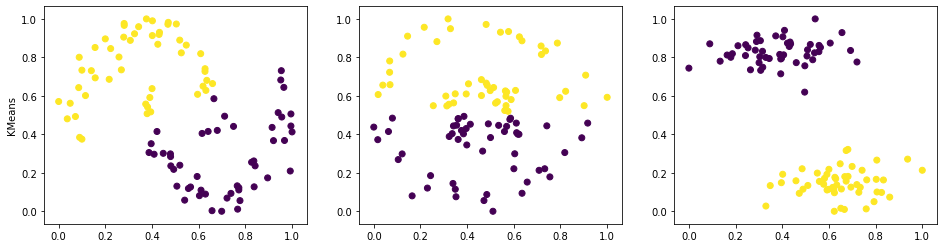

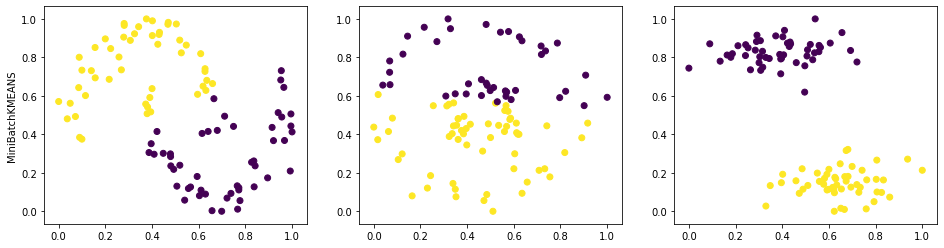

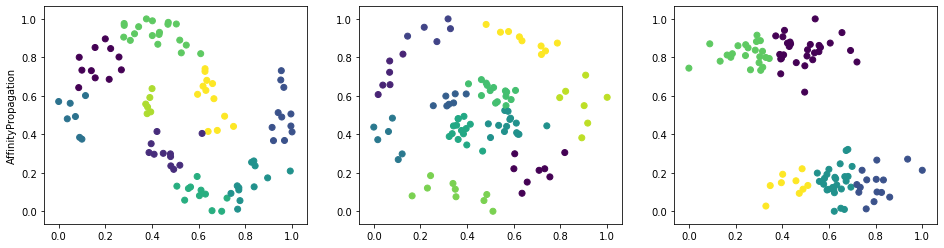

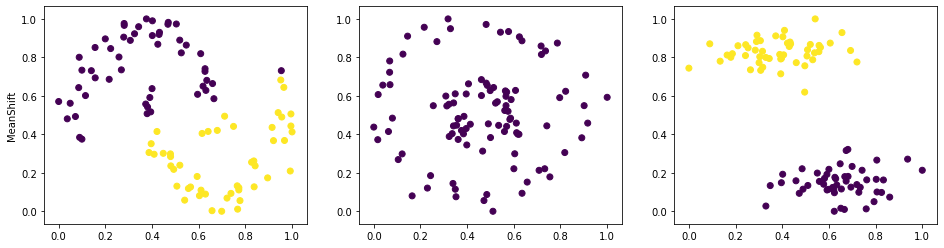

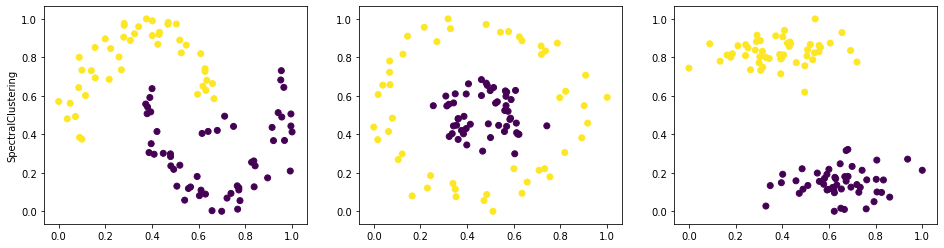

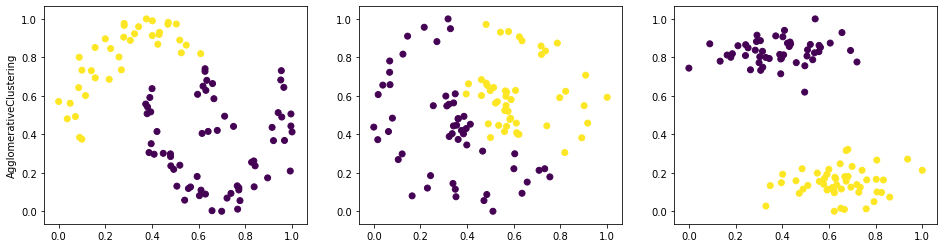

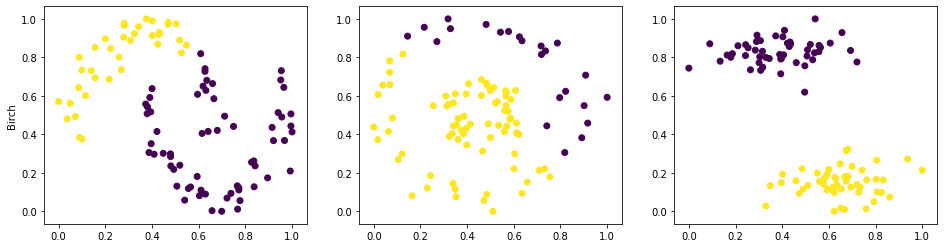

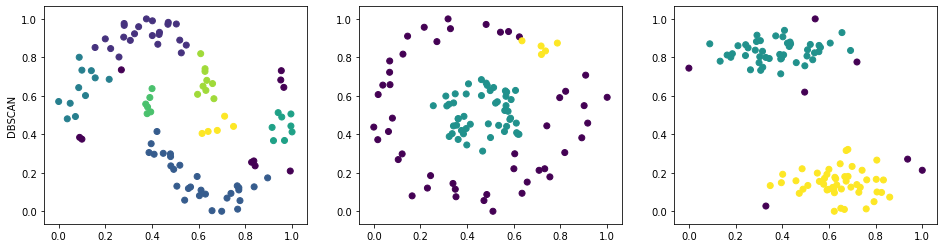

In [15]:
from sklearn import cluster

pipe_names=['KMeans','MiniBatchKMEANS','AffinityPropagation','MeanShift','SpectralClustering','AgglomerativeClustering','Birch','DBSCAN']

pipe_estimators=[cluster.KMeans(n_clusters=2),
                 cluster.MiniBatchKMeans(n_clusters=2),
                 cluster.AffinityPropagation(),
                 cluster.MeanShift(),
                 cluster.SpectralClustering(n_clusters=2,affinity='nearest_neighbors',n_neighbors=6),
                 cluster.AgglomerativeClustering(),
                 cluster.Birch(n_clusters=2,threshold=.1),
                 cluster.DBSCAN(eps=.1)]

for name,algorithm in zip(pipe_names,pipe_estimators):
    moons_c=algorithm.fit_predict(moons)
    circles_c=algorithm.fit_predict(circles)
    blobs_c=algorithm.fit_predict(blobs)
    
    fig,ax=plt.subplots(1,3,figsize=(16,4))
    ax[0].scatter(moons[:,0],moons[:,1],c=moons_c)
    ax[0].set_ylabel('{}'.format(name))
    ax[1].scatter(circles[:,0],circles[:,1],c=circles_c)
    ax[2].scatter(blobs[:,0],blobs[:,1],c=blobs_c)

In [19]:
def createData(n):
    blobs,_=datasets.make_blobs(n_samples=n,n_features=2,centers=2,cluster_std=1.5,random_state=10)
    return blobs

KMeans takes average 0.013462
MiniBatchKMEANS takes average 0.013958


/Users/rena/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/Users/rena/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/Users/rena/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/Users/rena/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have

AffinityPropagation takes average 0.923429
MeanShift takes average 1.283993
SpectralClustering takes average 0.042801
AgglomerativeClustering takes average 0.007271
Birch takes average 0.014052
DBSCAN takes average 0.002750


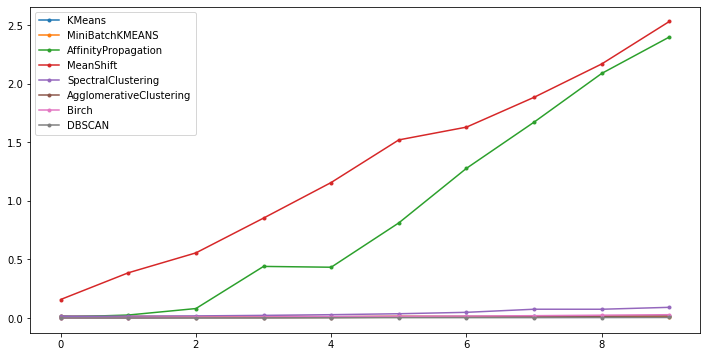

In [24]:
import time

pipe_names=['KMeans','MiniBatchKMEANS','AffinityPropagation','MeanShift','SpectralClustering','AgglomerativeClustering','Birch','DBSCAN']

pipe_estimators=[cluster.KMeans(n_clusters=2),
                 cluster.MiniBatchKMeans(n_clusters=2),
                 cluster.AffinityPropagation(),
                 cluster.MeanShift(),
                 cluster.SpectralClustering(n_clusters=2),#affinity='nearest_neighbors',n_neighbors=6),
                 cluster.AgglomerativeClustering(),
                 cluster.Birch(n_clusters=2),#threshold=.1),
                 cluster.DBSCAN()]#eps=.1)]

fit_time=[]
for name,algorithm in zip(pipe_names,pipe_estimators):
    Time=[]
    for n in [i for i in range(100,1100,100)]:
        testData=createData(n)
        t0=time.time()
        clusters=algorithm.fit(testData)
        t1=time.time()
        Time.append(t1-t0)
        mean_time=np.mean(Time)
    print('{} takes average {:4f}'.format(name,np.mean(Time)))
    fit_time.append(Time)

plt.figure(figsize=(12,6))
for n,t in zip(pipe_names,fit_time):
    plt.plot(t,marker='.',label=n)
    plt.legend()